<a href="https://colab.research.google.com/github/paigeyeung/exowatch-colab/blob/master/New_Transit_Submission_Notebook_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab for Viewing and Submitting EXOTIC Outputs for Qatar-1 b

In [ ]:
#@title Mount Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#@title Import modules

from IPython.display import Image
from ipywidgets import widgets, HBox

!pip install pygsheets
!pip install kora

from kora.xattr import get_id
import pygsheets
import google.auth
import pandas as pd
from gspread_dataframe import get_as_dataframe, set_with_dataframe
import os
import subprocess
import shutil
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
import os
from astropy.time import Time
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import json

     |████████████████████████████████| 153kB 7.7MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 


In [ ]:
#@title Authorize access to Google Sheets
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

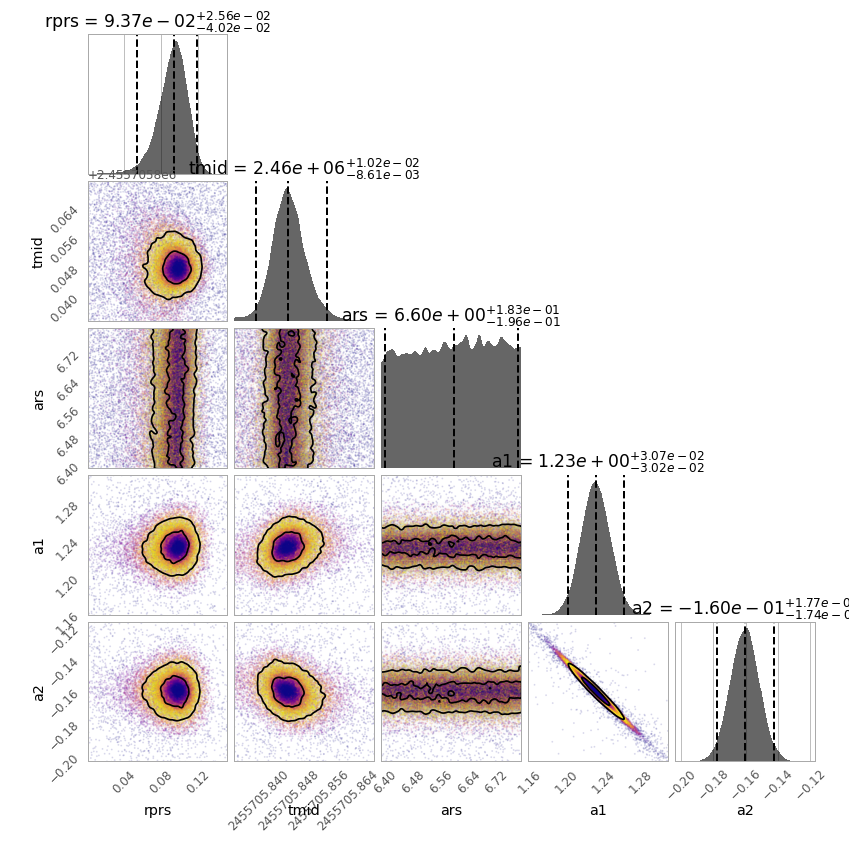

In [ ]:
#@title View transit for submission
planet = "Qatar-1 b"
date_obs = "2011-05-24" #@param {type:"string"}
date_before_date_obs = "2011-05-23" #@param {type:"string"}

output_date_obs = date_before_date_obs
# (date_obs[0:len(date_obs)-1] + str(int(date_obs[len(date_obs)-1:])-1))

output_dir = ("/content/drive/MyDrive/Qatar-1b-transits/erw_output/"+date_obs+"/")

imageA = widgets.Image(value=open(output_dir+"FinalLightCurve_"+planet+"_"+output_date_obs+".png", 'rb').read())
imageB = widgets.Image(value=open(output_dir+"FOV_"+planet+"_"+output_date_obs+"_LinearStretch.png", 'rb').read())
hbox = HBox([imageB, imageA])
display(hbox)
display(Image(filename=output_dir+"temp/Triangle_"+planet+"_"+output_date_obs+".png"))

## Replace the inputs below with your own name, folder to transits, spreadsheet link, lightcurve classification, and notes (optional).

In [ ]:
#@title Submit above lightcurve

name = "Paige Yeung" #@param {type:"string"}
fid = get_id('/content/drive/MyDrive/Qatar-1b-transits/erw_output/'+date_obs+'/')
link_to_out = "https://drive.google.com/drive/folders/"+fid
lightcurve_fid = get_id('/content/drive/MyDrive/Qatar-1b-transits/erw_output/'+date_obs+
                        '/'+'FinalLightCurve_Qatar-1 b_'+date_before_date_obs+'.png')
folder_to_transits = "/content/drive/MyDrive/Qatar-1b-transits/"
folder_to_transits_unix = folder_to_transits.replace(' ', '\\\\ ')
# transit = "2012-10-02" #@param {type:"string"}
transit = date_obs
your_own_spreadsheet_link = "https://docs.google.com/spreadsheets/d/1q3gxE3i7ELuP9um1aX2WF4gIOzkhCyh--jawHoey3PI/edit#gid=0" #@param {type:"string"}
transit_outcome = "Good Lightcurve" #@param ["Good Lightcurve", "Partial Lightcurve", "Poor Lightcurve", "Poor Weather", "Technical Issue"]
link_to_lightcurve = 'https://drive.google.com/file/d/'+lightcurve_fid+'/view'

notes = "no comp star used" #@param {type:"string"}
spreadsheet_link = 'https://docs.google.com/spreadsheets/d/1XnjN8fkCO9AoNOVExqsyfPdg6WqngHZ5BZihriYDY-Q/edit#gid=0'
#@title Lightcurve Submission Form
i = 0
while i == 0:
  # if not (os.path.isdir(os.path.join(output_dir,'Comp'+str(comp_star))) and os.path.isdir(os.path.join(folder_to_transits,transit))):
  #   raise ValueError('Your output directory or your transit folder does not exist. Please correct it and rerun this cell.')
  sh = gc.open_by_url(spreadsheet_link)
  sheet = sh.worksheet('Sheet1')
  sheet = sheet.get_all_values()
  wks = sh.sheet1
  folder_to_fits = folder_to_transits+transit+'/images/'
  folder_to_fits_unix = folder_to_transits_unix+transit+'/images/'
  images = os.listdir(folder_to_fits)
  print(images)
  ims_by_date = []
  for image in images:
    if image[-4:].lower() != 'fits':
      continue
    hdul = fits.open(folder_to_fits+image)
    ims_by_date.append((hdul[0].header['DATE-END'],image))
  ims_by_date = np.array(ims_by_date)
  if len(ims_by_date) == 0:
    mtt = 'n/a'
    mtt_u = 'n/a'
    RpRs = 'n/a'
    RpRs_u = 'n/a'
    depth_u = 'n/a'
    fit_am1 = 'n/a'
    fit_am1_u = 'n/a'
    fit_am2 = 'n/a'
    fit_am2_u = 'n/a'
    residual_scatter = 'n/a'
    df = pd.DataFrame()
    df['transit']=[transit]
    df['name']=[name]
    df['link_to_out']=[link_to_out]
    df['mtt']=[str(mtt)]
    df['mtt_u']=[str(mtt_u)]
    df['residual_scatter']=[str(residual_scatter)]
    df['expected_transit_midpoint']=['n/a']
    df['epoch']=['n/a']
    df['O-C']=['=if(and(not(isblank(E'+str(len(sheet)+1)+')),not(isblank(H'+str(len(sheet)+1)+')), NOT(E'+str(len(sheet)+1)+' = "n/a")),(E'+str(len(sheet)+1)+'-H'+str(len(sheet)+1)+')*24*60,"n/a")']
    df['transit_outcome']=[transit_outcome]
    df['lightcurve_image']=[link_to_lightcurve]
    df['notes']=[notes]
    set_with_dataframe(wks, df,row=len(sheet)+1,allow_formulas=True,include_column_header=False)
    if your_own_spreadsheet_link != 'none':
      sh = gc.open_by_url(your_own_spreadsheet_link)
      sheet = sh.worksheet('Sheet1')
      sheet = sheet.get_all_values()
      wks = sh.sheet1
      set_with_dataframe(wks, df,row=len(sheet)+1,allow_formulas=True,include_column_header=False)
    break
  #print(np.argmin(np.array([[1,0],[2,3],[3,4],[4,5],[1,8])))
  print(np.argmax(ims_by_date,0))
  print(ims_by_date)
  end = ims_by_date[np.argmax(ims_by_date,1)[0]][0]
  t = Time.strptime(end, "%Y-%m-%dT%H:%M:%S.%f%z")
  transit_midpoint = 2456234.10321800  # observed transit midpoint  
  period = 1.42002420
  obs_end = (t.jd - transit_midpoint)/period
  print(obs_end)
  num_periods = round(obs_end)

  expected_transit_midpoint = transit_midpoint + (num_periods * period)
  if os.path.isfile(output_dir+'FinalParams_Qatar-1 b_'+output_date_obs+".json"):    
      with open(output_dir+'FinalParams_'+'Qatar-1 b_'+output_date_obs+".json") as infile:
          params = json.load(infile)

          print(params)
          mtt = str(params["FINAL PLANETARY PARAMETERS"]["Mid-Transit Time (Tmid)"]).split()[0]
          mtt_u = str(params["FINAL PLANETARY PARAMETERS"]["Mid-Transit Time (Tmid)"]).split()[2]
          RpRs = str(params["FINAL PLANETARY PARAMETERS"]["Ratio of Planet to Stellar Radius (Rp/Rs)"]).split()[0]
          RpRs_u = str(params["FINAL PLANETARY PARAMETERS"]["Ratio of Planet to Stellar Radius (Rp/Rs)"]).split()[2]
          depth_u = float(str(params["FINAL PLANETARY PARAMETERS"]["Transit depth (Rp/Rs)^2"]).split()[2])/100
          fit_am1 = str(params["FINAL PLANETARY PARAMETERS"]["Airmass coefficient 1 (a1)"]).split()[0]
          fit_am1_u = str(params["FINAL PLANETARY PARAMETERS"]["Airmass coefficient 1 (a1)"]).split()[2]
          fit_am2 = str(params["FINAL PLANETARY PARAMETERS"]["Airmass coefficient 2 (a2)"]).split()[0]
          fit_am2_u = str(params["FINAL PLANETARY PARAMETERS"]["Airmass coefficient 2 (a2)"]).split()[2]
          residual_scatter = float(str(params["FINAL PLANETARY PARAMETERS"]["Scatter in the residuals of the lightcurve fit is"]).split()[0])/100
  else:
    mtt = 'n/a'
    mtt_u = 'n/a'
    RpRs = 'n/a'
    RpRs_u = 'n/a'
    depth_u = 'n/a'
    fit_am1 = 'n/a'
    fit_am1_u = 'n/a'
    fit_am2 = 'n/a'
    fit_am2_u = 'n/a'
    residual_scatter = 'n/a'
  df = pd.DataFrame()
  df['transit']=[transit]
  df['name']=[name]
  df['link_to_out']=[link_to_out]
  df['mtt']=[str(mtt)]
  df['mtt_u']=[str(mtt_u)]
  df['residual_scatter']=[str(residual_scatter)]
  df['expected_transit_midpoint']=[str(expected_transit_midpoint)]
  df['epoch']=['=(G'+str(len(sheet)+1)+'-$G$2)/'+str(period)]
  df['O-C']=['=if(and(not(isblank(D'+str(len(sheet)+1)+')),not(isblank(G'+str(len(sheet)+1)+')), NOT(D'+str(len(sheet)+1)+' = "n/a")),(D'+str(len(sheet)+1)+'-G'+str(len(sheet)+1)+')*24*60,"n/a")']
  df['transit_outcome']=[transit_outcome]
  df['lightcurve_image']=[link_to_lightcurve]
  df['notes']=[notes]
  set_with_dataframe(wks, df,row=len(sheet)+1,allow_formulas=True,include_column_header=False)
  if your_own_spreadsheet_link != 'none':
    sh = gc.open_by_url(your_own_spreadsheet_link)
    sheet = sh.worksheet('Sheet1')
    sheet = sheet.get_all_values()
    wks = sh.sheet1
    if os.path.isfile(output_dir+'/'+'FinalParams_'+'Qatar-1 b_'+output_date_obs+".json"):
      with open(output_dir+'FinalParams_'+'Qatar-1 b_'+output_date_obs+".json") as infile:
        params = json.load(infile)

        print(params)
        mtt = str(params["FINAL PLANETARY PARAMETERS"]["Mid-Transit Time (Tmid)"]).split()[0]
        mtt_u = str(params["FINAL PLANETARY PARAMETERS"]["Mid-Transit Time (Tmid)"]).split()[2]
        RpRs = str(params["FINAL PLANETARY PARAMETERS"]["Ratio of Planet to Stellar Radius (Rp/Rs)"]).split()[0]
        RpRs_u = str(params["FINAL PLANETARY PARAMETERS"]["Ratio of Planet to Stellar Radius (Rp/Rs)"]).split()[2]
        depth_u = float(str(params["FINAL PLANETARY PARAMETERS"]["Transit depth (Rp/Rs)^2"]).split()[2])/100
        fit_am1 = str(params["FINAL PLANETARY PARAMETERS"]["Airmass coefficient 1 (a1)"]).split()[0]
        fit_am1_u = str(params["FINAL PLANETARY PARAMETERS"]["Airmass coefficient 1 (a1)"]).split()[2]
        fit_am2 = str(params["FINAL PLANETARY PARAMETERS"]["Airmass coefficient 2 (a2)"]).split()[0]
        fit_am2_u = str(params["FINAL PLANETARY PARAMETERS"]["Airmass coefficient 2 (a2)"]).split()[2]
        residual_scatter = float(str(params["FINAL PLANETARY PARAMETERS"]["Scatter in the residuals of the lightcurve fit is"]).split()[0])/100

    else:
      mtt = 'n/a'
      mtt_u = 'n/a'
      RpRs = 'n/a'
      RpRs_u = 'n/a'
      depth_u = 'n/a'
      fit_am1 = 'n/a'
      fit_am1_u = 'n/a'
      fit_am2 = 'n/a'
      fit_am2_u = 'n/a'
      residual_scatter = 'n/a'
    df = pd.DataFrame()
    df['transit']=[transit]
    df['name']=[name]
    df['link_to_out']=[link_to_out]
    df['mtt']=[str(mtt)]
    df['mtt_u']=[str(mtt_u)]
    df['residual_scatter']=[str(residual_scatter)]
    df['expected_transit_midpoint']=[str(expected_transit_midpoint)]
    df['epoch']=['=(G'+str(len(sheet)+1)+'-$G$2)/'+str(period)]
    df['O-C']=['=if(and(not(isblank(D'+str(len(sheet)+1)+')),not(isblank(G'+str(len(sheet)+1)+')), NOT(D'+str(len(sheet)+1)+' = "n/a")),(D'+str(len(sheet)+1)+'-G'+str(len(sheet)+1)+')*24*60,"n/a")']
    df['transit_outcome']=[transit_outcome]
    df['lightcurve_image']=[link_to_lightcurve]
    df['notes']=[notes]
    set_with_dataframe(wks, df,row=len(sheet)+1,allow_formulas=True,include_column_header=False)
  i=1

['Qatar-1110524064513.FITS', 'Qatar-1110524064813.FITS', 'Qatar-1110524065112.FITS', 'Qatar-1110524065413.FITS', 'Qatar-1110524065713.FITS', 'Qatar-1110524070013.FITS', 'Qatar-1110524070313.FITS', 'Qatar-1110524070613.FITS', 'Qatar-1110524070913.FITS', 'Qatar-1110524071213.FITS', 'Qatar-1110524071513.FITS', 'Qatar-1110524071813.FITS', 'Qatar-1110524072113.FITS', 'Qatar-1110524072413.FITS', 'Qatar-1110524072712.FITS', 'Qatar-1110524073013.FITS', 'Qatar-1110524073313.FITS', 'Qatar-1110524073613.FITS', 'Qatar-1110524073913.FITS', 'Qatar-1110524074213.FITS', 'Qatar-1110524074513.FITS', 'Qatar-1110524074813.FITS', 'Qatar-1110524075113.FITS', 'Qatar-1110524075413.FITS', 'Qatar-1110524075713.FITS', 'Qatar-1110524080012.FITS', 'Qatar-1110524080313.FITS', 'Qatar-1110524080613.FITS', 'Qatar-1110524080913.FITS', 'Qatar-1110524081213.FITS', 'Qatar-1110524081513.FITS', 'Qatar-1110524081813.FITS', 'Qatar-1110524082113.FITS', 'Qatar-1110524082413.FITS', 'Qatar-1110524082713.FITS', 'Qatar-111052408301

[71 71]
[['2011-05-23T23:46:15.848-0700' 'Qatar-1110524064513.FITS']
 ['2011-05-23T23:49:15.042-0700' 'Qatar-1110524064813.FITS']
 ['2011-05-23T23:52:14.269-0700' 'Qatar-1110524065112.FITS']
 ['2011-05-23T23:55:15.954-0700' 'Qatar-1110524065413.FITS']
 ['2011-05-23T23:58:15.030-0700' 'Qatar-1110524065713.FITS']
 ['2011-05-24T00:01:15.378-0700' 'Qatar-1110524070013.FITS']
 ['2011-05-24T00:04:15.141-0700' 'Qatar-1110524070313.FITS']
 ['2011-05-24T00:07:15.898-0700' 'Qatar-1110524070613.FITS']
 ['2011-05-24T00:10:15.324-0700' 'Qatar-1110524070913.FITS']
 ['2011-05-24T00:13:15.790-0700' 'Qatar-1110524071213.FITS']
 ['2011-05-24T00:16:15.370-0700' 'Qatar-1110524071513.FITS']
 ['2011-05-24T00:19:15.640-0700' 'Qatar-1110524071813.FITS']
 ['2011-05-24T00:22:14.990-0700' 'Qatar-1110524072113.FITS']
 ['2011-05-24T00:25:15.439-0700' 'Qatar-1110524072413.FITS']
 ['2011-05-24T00:28:14.875-0700' 'Qatar-1110524072712.FITS']
 ['2011-05-24T00:31:15.843-0700' 'Qatar-1110524073013.FITS']
 ['2011-05-24T00